# Preprocesado

Se crean 2 funciones ``seleccionar_cols()`` y ``modificar_cols()``. En la primera se seleccionan características que, a priori, tienen relación con el arancel y aportan al análisis. La segunda utiliza las columnas seleccionadas para modificar algunas, y también crear otras columnas nuevas a partir de algunas existentes, con el fin de obtener información más útil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import *
from datetime import date

Con esto se seleccionan 13 columnas de 49 con ``seleccionar_cols()``.

Con  ``modificar_cols()`` se modifican las columnas: 
- ``GEN_ALU``: Se cambia la variable de numérica a categórica.
- ``ACRE_INST_ANIO``: Se modifican los valores nan por 0.
- ``DUR_TOTAL_CARR``: Se modifican las unidades, pasa de ser duración en semestres a duración en años.

También se crean 2 nuevas columnas:
- ``EDAD_ALU``: Edad del estudiante al cual corresponde la matrícula, hace más directo el análisis de datos, variable numérica.
- ``ANIOS_U``: Años que el estudiante lleva en la universidad, hace más directo el filtrado de datos, variable numérica.

In [ ]:
cols = ['tipo_inst_2','nomb_inst','region_sede','nivel_carrera_2','cine_f_13_area',
        'acreditada_carr','cat_periodo','GEN_ALU','FEC_NAC_ALU','anio_ing_carr_ori',
        'dur_total_carr','valor_arancel','acre_inst_anio']

anios = [2011,2012,2013,2014,2015,2016,2017,2018]

for anio in anios:
    filename = f'data/{anio}.csv'
    seleccionar_cols(filename ,anio ,cols)
    filename = f'data_acre/data_acre_{anio}.csv'
    modificar_cols(filename , anio)

Se realiza para cada uno de los años desde 2011 a 2018, se guardan los dataframe en nuevos archivos ``.csv`` lo que permite un mejor manero posterior, con archivos más livianos.

# Histogramas

De las 15 columnas obtenidas en la parte anterior se decide continuar sólo con 11: 10 destinadas a obtener histogramas, y 1 columna que indica si la carrera está acreditada o no. De las 10 columnas, 5 son categóricas y 5 numéricas, se crean 2 funciones para plotear los histogramas de cada tipo: ``histogramasCategoricas()`` y ``histogramasNumericas()``.

In [8]:
#Ejemplo de dataframe
anio = 2011
filename = f'data_acre/modif_acre_{anio}.csv'
df = pd.read_csv(filename, error_bad_lines=False)

df.head()

,tipo_inst_2,region_sede,nivel_carrera_2,cine_f_13_area,GEN_ALU,acreditada_carr,dur_total_carr,valor_arancel,edad_alu,acre_inst_anio,anios_U
0,Centros de Formación Técnica,Metropolitana,Carreras Técnicas,Salud y Bienestar,femenino,NO ACREDITADA,2.5,400000.0,24,0.0,0
1,Centros de Formación Técnica,Metropolitana,Carreras Técnicas,Artes y Humanidades,femenino,ACREDITADA,4.0,1628000.0,21,0.0,0
2,Centros de Formación Técnica,Antofagasta,Carreras Técnicas,Servicios,femenino,NO ACREDITADA,2.5,912000.0,18,0.0,1
3,Centros de Formación Técnica,Antofagasta,Carreras Técnicas,Administración de Empresas y Derecho,femenino,NO ACREDITADA,2.5,840000.0,17,0.0,1
4,Centros de Formación Técnica,Antofagasta,Carreras Técnicas,Administración de Empresas y Derecho,femenino,NO ACREDITADA,2.5,840000.0,20,0.0,1


Cabe destacar que en ``histogramasNumericas()`` también hay modificación de datos, donde la columna ``DUR_TOTAL_CARR`` pasa a ser tipo entero, y ``VALOR_ARANCEL`` ahora está discretizada en tramos de 500,000 $CLP. Aquí también se toman estadísticos de las columnas que son consideradas más útiles, de ``VALOR_ARANCEL`` se toma el promedio y la desviación estándar, de ``ANIOS_U`` se guarda la cantidad normalizada de matriculas nuevas acreditadas y no acreditadas. Estos estadísticos se cuardan en un archivo llamado ``valores_temporales.csv`` para ser trabajados más adelante. 

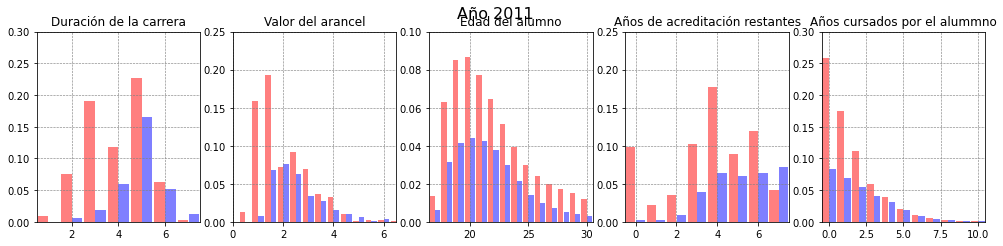

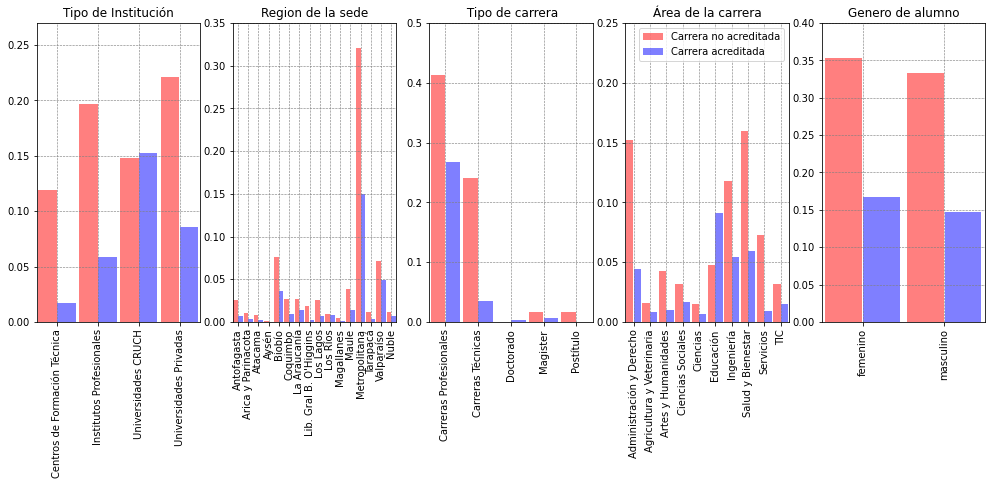

In [3]:
anios = [2011,2012,2013,2014,2015,2016,2017,2018]
PANA = []#promedio de arancel no acreditado
PASA = []#promedio de arancel no acreditado
DANA = []#desviacion estandar de arancel no acreditado
DASA = []#desviacion estandar de arancel acreditado
NNA = []#cantidad de alumnos nuevos no acreditado
NSA = []#cantidad de alumnos nuevos acreditado
a = []

for anio in anios:
    filename = f'data_acre/modif_acre_{anio}.csv'
    df = pd.read_csv(filename, error_bad_lines=False)
    dic = histogramasNumericas(df,anio)
    histogramasCategoricas(df,anio)

    PANA = np.append(PANA,dic['NAarancel_mean'])
    PASA = np.append(PASA,dic['Aarancel_mean'])
    DANA = np.append(DANA,dic['NAarancel_std'])
    DASA = np.append(DASA,dic['Aarancel_std'])
    NNA = np.append(NNA,dic['NAnuevos'])
    NSA = np.append(NSA,dic['Anuevos'])


# Evolución Temporal

Se grafican los estadísticos importantes para analizar, de manera visual, evolución de estos desde el 2011 al 2018. 

In [6]:
filename = 'valores_temporales.csv'
idx = ['mean_no_ac', 'mean_ac', 'std_no_ac', 'std_ac', 'nuevos_no_ac', 'nuevos_ac']
df = pd.read_csv(filename, error_bad_lines=False)
df.index = idx

df

,2011,2012,2013,2014,2015,2016,2017,2018
mean_no_ac,2.00,2.2,2.20,2.30,2.40,2.4,2.50,2.50
mean_ac,2.50,2.5,2.60,2.70,2.80,2.9,3.10,3.10
std_no_ac,1.10,1.3,1.20,1.20,1.30,1.4,1.40,1.40
std_ac,1.10,1.2,1.20,1.40,1.40,1.4,1.40,1.40
nuevos_no_ac,0.76,0.7,0.67,0.64,0.55,0.5,0.43,0.45
nuevos_ac,0.24,0.3,0.33,0.36,0.45,0.5,0.57,0.55


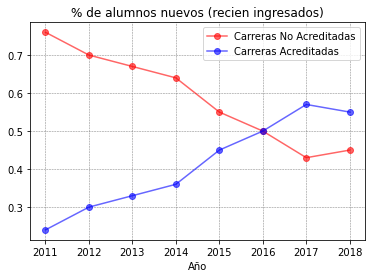

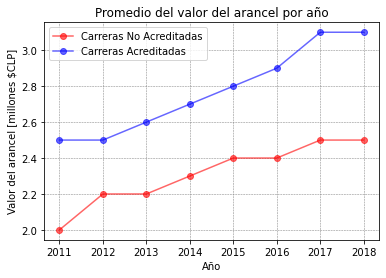

In [7]:
x = df.columns.values
pltMetrica(x,df.iloc[4],df.iloc[5],ylabel= '',title= '% de alumnos nuevos (recien ingresados)')
pltMetrica(x,df.iloc[0],df.iloc[1],ylabel= 'Valor del arancel [millones $CLP]',title= 'Promedio del valor del arancel por año')

# Análisis

No todas las columnas muestran información relevante para ser utilizada directamente con la acreditación de una carrera. En primera instancia es bueno inspaccionar sólo las columnas más relevantes, sin embargo no se descarta la idea de que el trabajo no supervisado (como clustering) sea útil para encontrar mejores relaciones con carreras acreditadas vs no acreditadas.

Se destaca que para ciertas áreas de carreras se ha vuelto muy relevante en este periodo la acreditación, en particular en Derecho, Ingeniería y Salud a cambiado drasticamente la cantidad de matriculas en carreras acreditadas vs. no acreditadas. Esto hace pensar que si hay un valor para las carreras de estas áreas estar acreditadas, ya que pueden pertenecer al al grupo de las más demandadas que es hacia donde se está moviendo la balanza. En el caso de Educación, no ha cambiado en los últimos años la relación, esto puede dar indicios de que en ciertas áreas no hay motivación de pasar de estado no acreditado, a acreditado.

En cuanto al valor del arancel de las carreras, las que están acreditadas efectivamente tienen mayores aranceles. La brecha entre aranceles no aumenta significativamente durante los años de estudio. Que los aranceles sean mayores no implica que una carrera, al acreditarse, pueda optar a cobrar aranceles más altos, para esto se necesita información adicional, queda propuesto hacer seguimiento del valor del arancel de carreras que pasan de estar No Acreditasas a Acreditasas, y viceversa, para poder concluir de mejor forma.

El hecho más llamativo que presentan los histogramas, y que se puede ver más claramente en el gráfico ``% de alumnos nuevos (recien ingresados)``, es que la cantidad de matrículas acreditadas a partir del 2016 supera la cantidad no acreditada. Esto se puede deber a 2 factores: que los alumnos nuevos prefieren inscribirse en carreras acreditadas, o que la oferta de cupos de carreras acreditadas es mayor comparada con las carreras no acreditadas. En cualquier caso, Se ve interés mayor por carreras acreditadas, por lo que este hecho ya genera un mayor valor para la acreditación, aunque no sea monetario directamente.



# Anexos

In [ ]:
def seleccionar_cols(filename ,anio ,cols):
    df = pd.read_csv(filename, error_bad_lines=False)
    df_filtered = df[cols]
    name = f'data_acre/data_acre_{anio}'
    df_filtered.to_csv(name+'.csv',index=False)
    return df_filtered


def modificar_cols(filename , anio):
    df = pd.read_csv(filename, error_bad_lines=False)
    #df = df.iloc[:20]
    ###############
    # numericas
    ###############
    #modificar genero
    df['GEN_ALU'] = df['GEN_ALU'].replace(to_replace = {1:'masculino' ,
                                                        2:'femenino'})
    #cambiar anios de acreditacion
    df['acre_inst_anio'] = df['acre_inst_anio'].fillna(0)

    #fecha de nacimiento
    df = df.dropna()
    df.index = np.arange(len(df))
    nac = pd.Series(data=np.arange(len(df)), index=np.arange(len(df)))
    ing = pd.Series(data=np.arange(len(df)), index=np.arange(len(df)))
    for i in range(len(df)):
        fecha_nac = str(int(df.iloc[i]['FEC_NAC_ALU']))
        fecha_ingreso = int(df.iloc[i]['anio_ing_carr_ori'])
        today = date(anio, 2, 1)
        nac.iloc[i] = int((today - date(int(fecha_nac[:4]), int(fecha_nac[4:]), 1)).days/365)
        ing.iloc[i] = int((today - date(fecha_ingreso, 1, 1)).days/365)
    df['edad_alu']  = nac
    df['anios_U']   = ing
    df = df.loc[df['edad_alu']>=0]
    df = df.loc[df['anios_U']>=0]
    df['dur_total_carr'] = df['dur_total_carr'] / 2

    cols_filter = ['tipo_inst_2','region_sede','nivel_carrera_2','cine_f_13_area','GEN_ALU',
                   'acreditada_carr','dur_total_carr','valor_arancel','edad_alu','acre_inst_anio','anios_U']


    name = f'data_acre/modif_acre_{anio}'
    df[cols_filter].to_csv(name+'.csv',index=False)

In [2]:
def histogramasCategoricas(df,anio):
    fig, axs = plt.subplots(nrows=1 ,ncols=5 ,figsize = (17,5.5))
    axs = axs.flatten()
    cols = df.columns.values
    count = 0
    total = len(df)
    cols_info = {'tipo_inst_2':('Tipo de Institución',(0,0.27)),
                 'region_sede':('Region de la sede',(0,0.35)),
                 'nivel_carrera_2': (' Tipo de carrera',(0,0.5)),
                 'cine_f_13_area':('Área de la carrera',(0,0.25)),
                 'GEN_ALU':('Genero de alumno',(0,0.4))}

    for i,col in enumerate(cols_info):
        title, ylim = cols_info[col]
        w = 0.45
        ax = axs[i]
        acre = (df['acreditada_carr'] == 'ACREDITADA')
        ndf = df[col]
        si_acre = ndf[acre]
        no_acre = ndf[acre==False]
        ass = si_acre.value_counts()
        an = no_acre.value_counts()
        bs = np.sort(ass.index.values)
        bn = np.sort(an.index.values)
        x = np.arange(len(bn))
        ax.bar(x-0.23,an[bs]/total,width= w,color='red',alpha = 0.5,label = 'Carrera no acreditada')
        ax.bar(x+0.23,ass[bs]/total,width= w,color='blue',alpha = 0.5,label = 'Carrera acreditada')
        ax.set_title(title)
        ax.grid(axis = 'both' ,color='gray', linestyle='--', linewidth=0.6)
        ax.xaxis.set_ticks(x)

        ax.set_xlim((-0.5,x[-1]+0.5))
        ax.set_ylim(ylim)
        if col == 'cine_f_13_area':
            bn = ['Administración y Derecho','Agricultura y Veterinaria',
                  'Artes y Humanidades', 'Ciencias Sociales','Ciencias',
                  'Educación','Ingeniería','Salud y Bienestar',
                  'Servicios','TIC']
            ax.legend()
        #ax.xaxis.set_ticks(bn)
        ax.set_xticklabels(bn, rotation=90)
    plt.show(block=False)
    fig.tight_layout()
    #plt.savefig(f'{anio}_Cat.png', format="png")
    
def histogramasNumericas(df,anio):
    fig, axs = plt.subplots(nrows=1 ,ncols=5 ,figsize = (17,3.5))
    axs = axs.flatten()
    cols = df.columns.values
    total = len(df)
    dic_metricas = {}
    cols_info = {'dur_total_carr':('Duración de la carrera',0.45,(0.5,7.5),(0,0.3)),
                'valor_arancel': ('Valor del arancel',0.22,(0,6.5),(0,0.25)),
                'edad_alu':('Edad del alumno',0.45,(16.5,30.5),(0,0.1)),
                'acre_inst_anio':('Años de acreditación restantes',0.45,(-0.5,7.5),(0,0.25)),
                'anios_U':('Años cursados por el alummno',0.45,(-0.5,10.5),(0,0.3))}

    df['dur_total_carr'] = np.ceil(df['dur_total_carr'].values).astype(np.int32)
    arancel_bins = np.arange(100)*500000
    df['valor_arancel'] = np.digitize(df['valor_arancel'].values, arancel_bins, right=True)/2

    for i,col in enumerate(cols_info):
        title, w, xlim, ylim = cols_info[col]
        ax = axs[i]
        acre = (df['acreditada_carr'] == 'ACREDITADA')
        ndf = df[col]
        si_acre = ndf[acre]
        no_acre = ndf[acre==False]
        ass = si_acre.value_counts()
        an = no_acre.value_counts()
        bs = np.sort(ass.index.values)
        bn = np.sort(an.index.values)
        xoffset = [0.23,0.11,0.23,0.23,0.23]
        ax.bar(bn-xoffset[i],an[bn]/total,width= w,color='red',alpha = 0.5,label = 'Carrera no acreditada')
        ax.bar(bs+xoffset[i],ass[bs]/total,width= w,color='blue',alpha = 0.5,label = 'Carrera acreditada')
        ax.set_title(title)
        ax.grid(axis = 'both' ,color='gray', linestyle='--', linewidth=0.6)
        #ax.xaxis.set_ticks(bn)
        #ax.legend()
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        if col == 'anios_U':
            total_nuevos = len(df[df['anios_U']==0])
            dic_metricas['NAnuevos'] =  round(an[bn][0]/total_nuevos,2)
            dic_metricas['Anuevos'] =  round(ass[bs][0]/total_nuevos,2)
        if col == 'valor_arancel':
            dic_metricas['NAarancel_mean'] = round(no_acre.mean(),1)
            dic_metricas['Aarancel_mean'] =  round(si_acre.mean(),1)
            dic_metricas['NAarancel_std'] =  round(no_acre.std(),1)
            dic_metricas['Aarancel_std'] =  round(si_acre.std(),1)
    fig.suptitle(f'Año {anio}', fontsize=16)
    plt.show(block=False)
    fig.tight_layout()
    return dic_metricas

In [4]:
def pltMetrica(x, y1, y2, ylabel= '', title= ''):
    fig, ax = plt.subplots(figsize = (6,4))
    ax.plot(x,y1,'o-',color = 'red',alpha = 0.6,label = 'Carreras No Acreditadas')
    ax.plot(x,y2,'o-',color = 'blue',alpha = 0.6,label = 'Carreras Acreditadas')
    ax.grid(axis = 'both' ,color='gray', linestyle='--', linewidth=0.5)
    ax.set_title(title)
    ax.set_xlabel('Año')
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show(block=False)
    fig.tight_layout()